Zadanie 1 Wczytanie danych do jednego pandas dataframe

In [66]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [67]:
data_path = './data'
dataframes = []

for filename in os.listdir(data_path):
    if filename.endswith(".txt"):
        year = int(filename[3:7])
        file_path = os.path.join(data_path, filename)

        df = pd.read_csv(file_path, header=None, names=["Name", "Sex", "Count"])
        df['Year'] = year
        dataframes.append(df)
all_data = pd.concat(dataframes, ignore_index=True)
all_data

,Name,Sex,Count,Year
0,Mary,F,63254,1942
1,Barbara,F,44736,1942
2,Patricia,F,39461,1942
3,Linda,F,31611,1942
4,Carol,F,30271,1942
...,...,...,...,...
2085153,Ysmael,M,5,1945
2085154,Zacarias,M,5,1945
2085155,Zach,M,5,1945
2085156,Zachariah,M,5,1945


Zadanie 2 Ile unikalnych imion zostalo nadanych w tym czasie

In [68]:
unique_names_count = all_data['Name'].nunique()
print(f"Liczba unikalnych imion w calym zbiorze: {unique_names_count}")

Liczba unikalnych imion w calym zbiorze: 102449


Zadanie 3 Ile unikalnych imion zostało nadanych rozróżniając płeć żeńską i męską

In [69]:
unique_names_by_sex = all_data.groupby(['Sex', 'Name'])['Name'].nunique()
unique_names_by_sex_count = unique_names_by_sex.groupby('Sex').sum()
print(f"Liczba unikalnych imion  F: {unique_names_by_sex_count['F']}, Liczba unikalnych imion M: {unique_names_by_sex_count['M']}")

Liczba unikalnych imion  F: 70227, Liczba unikalnych imion M: 43655


Zadanie 4 Stwórz nowe kolumny frequency_male i frequency_female i określ popularność każdego z imion w danym każdym roku dzieląc liczbę razy, kiedy imię zostało nadane przez całkowita liczbę urodzeń dla danej płci.

In [70]:
# Suma urodzeń dla każdego roku i płci 
all_data['Total_birth'] = all_data.groupby(['Year', 'Sex'])['Count'].transform('sum')
all_data['Frequency_appearance'] = all_data['Count']/all_data['Total_birth']

result_data = all_data.pivot(index=['Year', 'Name'], columns='Sex', values='Frequency_appearance').fillna(0).reset_index()
result_data.rename(columns={"F" : "frequency_female", "M" : "frequency_male"}, inplace=True)
result_data

Sex,Year,Name,frequency_female,frequency_male
0,1880,Aaron,0.000000,0.000923
1,1880,Ab,0.000000,0.000045
2,1880,Abbie,0.000780,0.000000
3,1880,Abbott,0.000000,0.000045
4,1880,Abby,0.000066,0.000000
...,...,...,...,...
1903285,2022,Zyrie,0.000000,0.000006
1903286,2022,Zyrin,0.000000,0.000003
1903287,2022,Zyron,0.000000,0.000007
1903288,2022,Zyrus,0.000000,0.000005


Zadanie 5 Określ i wyświetl wykres złożony z dwóch podwykresów, gdzie osią x jest skala czasu, a oś y reprezentuje: liczbę urodzin w danym roku (wykres na górze), stosunek liczby narodzin dziewczynek do liczby narodzin chłopców w każdym roku(wykres na dole) W którym roku zanotowano najmniejszą, a w którym największą różnicę w liczbie urodzeń między chłopcami a dziewczynkami (pytanie dotyczy podwykresu przedstawiającego stosunek liczby urodzin)? Odpowiedź wyznacz i wyświetl na ekranie

In [87]:
# Sum of births per year (all female + male results)
all_data['Total_birth_fm'] = all_data.groupby(['Year'])['Count'].transform('sum')
total_births_per_year = all_data[['Year', 'Total_birth_fm']].groupby(['Year'], as_index=False).mean()
total_births_per_year

,Year,Total_birth_fm
0,1880,201484.0
1,1881,192690.0
2,1882,221533.0
3,1883,216945.0
4,1884,243461.0
...,...,...
138,2018,3511750.0
139,2019,3465821.0
140,2020,3333981.0
141,2021,3379713.0


Text(0.5, 1.0, 'Total births of per year')

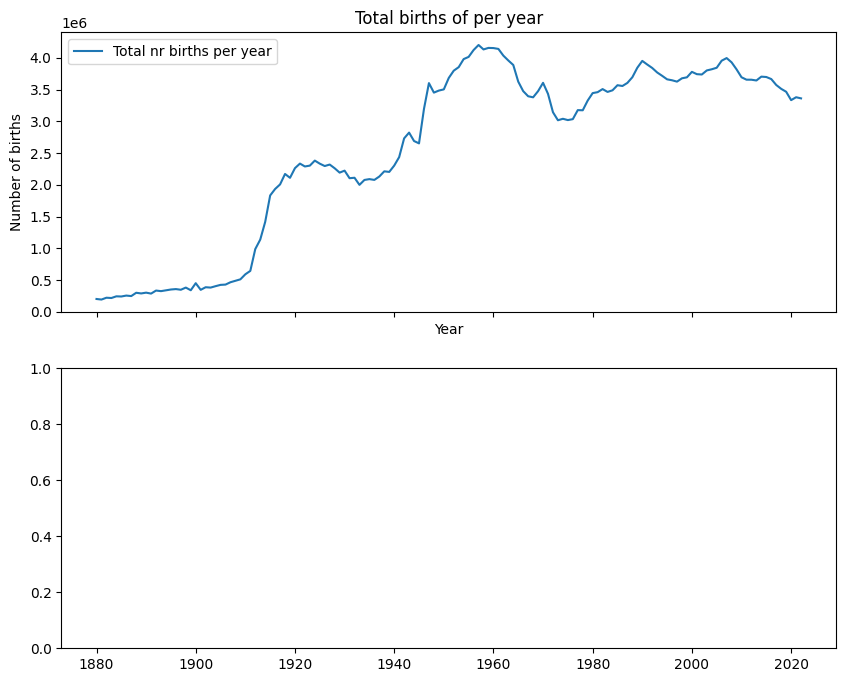

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey = False, figsize=(10, 8))

axes[0].plot(total_births_per_year['Year'], total_births_per_year['Total_birth_fm'])
axes[0].set_ylabel('Number of births')
axes[0].set_xlabel('Year')
axes[0].legend(['Total nr births per year'], loc='upper left')
axes[0].set_title('Total births of per year')